In [1]:
 %matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
all_data = pd.merge(ride_data, city_data, on="city", how="left")
# Display the data table for preview
all_data.head()




,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

<IPython.core.display.Javascript object>


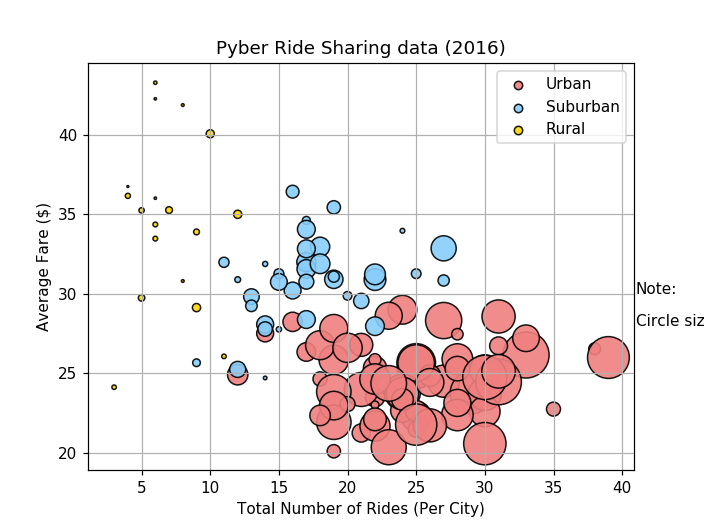

In [2]:
# Obtain the x and y coordinates for each of the three city types

urban_data = []
sub_data =[]
rural_data = []
urban_final = pd.DataFrame()
sub_final = pd.DataFrame()
rural_final = pd.DataFrame()

#separates the area types
urban_data = all_data.loc[all_data['type'] == "Urban"]
sub_data = all_data.loc[all_data['type'] == "Suburban"]
rural_data = all_data.loc[all_data['type'] == "Rural"]

#creates a cleaner dataframe
urban_cleaned=urban_data[["city", "fare", "driver_count", "ride_id"]]
sub_cleaned=sub_data[["city", "fare", "driver_count", "ride_id"]]
rural_cleaned=rural_data[["city", "fare", "driver_count", "ride_id"]]

#creates final urban DF with values needed for scatter plot
urban_final['average fare'] = urban_cleaned.groupby("city")["fare"].mean()
urban_final['total driver'] = urban_cleaned.groupby("city")["driver_count"].sum()
urban_final['total rides'] = urban_cleaned.groupby("city")["ride_id"].count()

x_urban = urban_final["total rides"]
s_urban = urban_final["total driver"]
y_urban = urban_final["average fare"]

#creates final suburban DF with values needed for scatter plot
sub_final['average fare'] = sub_cleaned.groupby("city")["fare"].mean()
sub_final['total driver'] = sub_cleaned.groupby("city")["driver_count"].sum()
sub_final['total rides'] = sub_cleaned.groupby("city")["ride_id"].count()

x_sub = sub_final["total rides"]
s_sub = sub_final["total driver"]
y_sub = sub_final["average fare"]

#creates final rural DF with values needed for scatter plot
rural_final['average fare'] = rural_cleaned.groupby("city")["fare"].mean()
rural_final['total driver'] = rural_cleaned.groupby("city")["driver_count"].sum()
rural_final['total rides'] = rural_cleaned.groupby("city")["ride_id"].count()

x_rural = rural_final["total rides"]
s_rural = rural_final["total driver"]
y_rural = rural_final["average fare"]

# Build the scatter plots for each city types
plt.scatter(x = x_urban, y = y_urban, marker='o', facecolors ="lightcoral", edgecolors="black", s=s_urban*.4, alpha=.90, label="Urban")
plt.scatter(x = x_sub, y = y_sub, marker='o', facecolors ="lightskyblue", edgecolors="black", s=s_sub*.4, alpha=.90, label="Suburban")
plt.scatter(x = x_rural, y= y_rural, marker='o', facecolors ="gold", edgecolors="black", s=s_rural*.4, alpha=.90, label= "Rural")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
#legend and circle size
legend = plt.legend(loc = "upper right")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
#outside text
text_out1 = "Note:"
text_out2 =  "Circle size correlates with driver count per city"
plt.text(41, 30,text_out1)# bbox_inches="tight")
plt.text(41, 28,text_out2)# bbox_inches="tight")



# Save Figure
plt.savefig("./pyber_ride_sharing_data.png", bbox_inches="tight")

In [3]:
# Show plot

plt.show("./pyber_ride_sharing_data.png")

## Total Fares by City Type

<IPython.core.display.Javascript object>


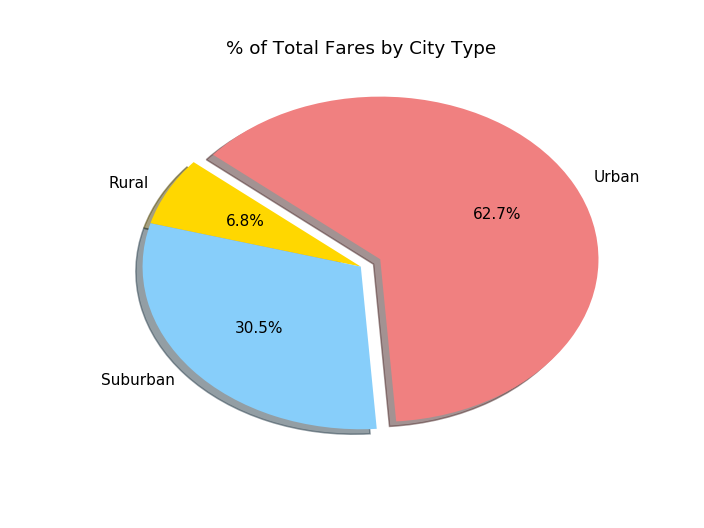

In [4]:
# sets up values needed for pie chart
labels = ["Rural", "Suburban", "Urban"]
fare_sizes = []
colors = ["gold","lightskyblue","lightcoral",]
explode = (0, 0, .1)

#total per city type
total_fare_urban = urban_cleaned['fare'].sum()
total_fare_sub = sub_cleaned['fare'].sum()
total_fare_rural = rural_cleaned['fare'].sum()

total_fare = all_data["fare"].sum()

#appends sizes
fare_sizes.append(total_fare_rural/total_fare)
fare_sizes.append(total_fare_sub/total_fare)
fare_sizes.append(total_fare_urban/total_fare)


# Build Pie Chart

plt.pie(fare_sizes, explode = explode, labels = labels, colors = colors, autopct ="%1.1f%%", shadow = True, startangle = 140)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("./percent_total_fares_by_city_pie.png")

In [5]:
# Show Figure
plt.show("./percent_total_fares_by_city_pie.png")

## Total Rides by City Type

<IPython.core.display.Javascript object>


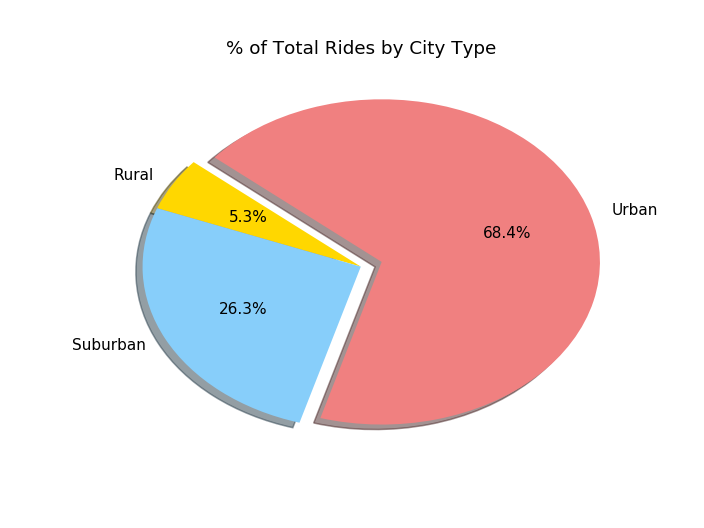

In [6]:
# Calculate Ride Percents

ride_sizes = []


ride_sizes.append(len(rural_data)/len(all_data))
ride_sizes.append(len(sub_data)/len(all_data))
ride_sizes.append(len(urban_data)/len(all_data))


# Build Pie Chart
plt.pie(ride_sizes, explode = explode, labels = labels, colors = colors, autopct ="%1.1f%%", shadow = True, startangle = 140)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("./percent_total_rides_by_city_pie.png")

In [7]:
# Show Figure
plt.show("./percent_total_rides_by_city_pie.png")

## Total Drivers by City Type

<IPython.core.display.Javascript object>


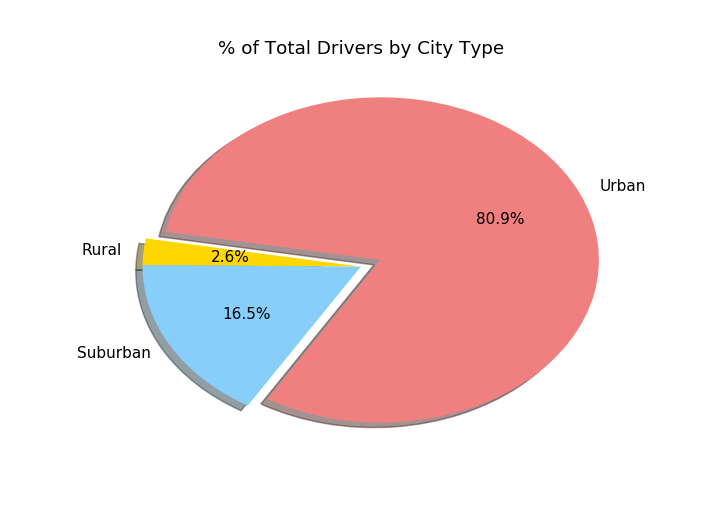

In [8]:
# Calculate Driver Percents

drive_sizes = [city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()]



# Build Pie Charts
plt.pie(drive_sizes[0], explode = explode, labels = labels, colors = colors, autopct ="%1.1f%%", shadow = True, startangle = 170)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("./percent_total_drivers_by_city_pie.png")





In [9]:
# Show Figure
plt.show("./percent_total_drivers_by_city_pie.png")